In [2]:
import numpy as np
import pandas as pd
import deeplabcut
import torch
from pathlib import Path

Loading DLC 3.0.0rc13...


# Data Loading and Config

In [11]:
from pathlib import Path

print("Current working directory:", Path.cwd())

Current working directory: c:\Users\jexia\OneDrive\Documents\projects\datafawn


In [ ]:
video_path = Path('videos/vid1.mp4').resolve()

videotype = video_path.suffix

Using GPU: NVIDIA GeForce RTX 5070 Ti Laptop GPU


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device('cpu')
    print("CUDA not available, using CPU")

# Running Pretrained Model

**NOTE**: we are using quadruped. This is for side-view of quadrupeds. There are other models (for humans, birds, top-down mouse, etc.)

In [28]:
scale_list = []
max_individuals = 1

processed_videos = deeplabcut.video_inference_superanimal(
    [video_path],
    'superanimal_quadruped',
    max_individuals=max_individuals,
    model_name='hrnet_w32',
    detector_name='fasterrcnn_resnet50_fpn_v2',
    videotype=videotype,
    # video_adapt=True,
    # scale_list=scale_list,
    pcutoff=0.15,
    dest_folder = 'processed_vids',
    device = device
)

Running video inference on [WindowsPath('C:/Users/jexia/OneDrive/Documents/projects/datafawn/videos/vid1.mp4')] with superanimal_quadruped_hrnet_w32
Using pytorch for model hrnet_w32
Processing video C:\Users\jexia\OneDrive\Documents\projects\datafawn\videos\vid1.mp4
Starting to analyze C:\Users\jexia\OneDrive\Documents\projects\datafawn\videos\vid1.mp4
Video metadata: 
  Overall # of frames:    1294
  Duration of video [s]:  51.76
  fps:                    25.0
  resolution:             w=1280, h=720

Running detector with batch size 1


100%|██████████| 1294/1294 [01:28<00:00, 14.60it/s]


Running pose prediction with batch size 1


100%|██████████| 1294/1294 [00:57<00:00, 22.65it/s] 


Saving results to processed_vids
Saving results in processed_vids\vid1_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5 and processed_vids\vid1_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__full.pickle


c:\Users\jexia\anaconda3\envs\DEEPLABCUT\Lib\site-packages\deeplabcut\utils\make_labeled_video.py:146: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Dataframe.groupby(level="individuals", axis=1).size().values // 3


Duration of video [s]: 51.76, recorded with 25.0 fps!
Overall # of frames: 1294 with cropped frame dimensions: 1280 720
Generating frames and creating video.


100%|██████████| 1226/1226 [00:12<00:00, 100.39it/s]

Video with predictions was saved as processed_vids


# EDA

In [3]:
# processed_data = processed_videos[video_path]

h5_file = 'processed_vids/vid1_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5'
processed_data = pd.read_hdf(h5_file)

In [4]:
processed_data

scorer      superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_  \
individuals                                                     animal0   
bodyparts                                                          nose   
coords                                                                x   
0                                                   488.000000            
1                                                   493.523438            
2                                                   491.062500            
3                                                   486.492188            
4                                                   487.843750            
...                                                        ...            
1221                                                 -1.000000            
1222                                                 -1.000000            
1223                                                 -1.000000            
1224                                                 -1.000000            
1225                                                 -1.000000            

scorer                                                                 \
individuals                                                             
bodyparts                            upper_jaw                          
coords                y likelihood           x           y likelihood   
0            320.000000   0.971568  488.000000  326.000000   0.883205   
1            327.023438   0.899327  493.523438  338.554688   0.866990   
2            339.023438   0.965898  491.062500  344.382812   0.901722   
3            346.937500   0.970562  486.492188  352.812500   0.889275   
4            360.593750   0.960633  487.843750  366.406250   0.914894   
...                 ...        ...         ...         ...        ...   
1221          -1.000000  -1.000000   -1.000000   -1.000000  -1.000000   
1222          -1.000000  -1.000000   -1.000000   -1.000000  -1.000000   
1223          -1.000000  -1.000000   -1.000000   -1.000000  -1.000000   
1224          -1.000000  -1.000000   -1.000000   -1.000000  -1.000000   
1225          -1.000000  -1.000000   -1.000000   -1.000000  -1.000000   

scorer                                                          ...  \
individuals                                                     ...   
bodyparts     lower_jaw                        mouth_end_right  ...   
coords                x           y likelihood               x  ...   
0            482.000000  332.000000   0.609739      482.000000  ...   
1            487.757812  338.554688   0.622246      487.757812  ...   
2            485.687500  349.742188   0.594593      485.687500  ...   
3            480.601562  358.687500   0.639118      480.601562  ...   
4            487.843750  366.406250   0.646538      482.031250  ...   
...                 ...         ...        ...             ...  ...   
1221          -1.000000   -1.000000  -1.000000       -1.000000  ...   
1222          -1.000000   -1.000000  -1.000000       -1.000000  ...   
1223          -1.000000   -1.000000  -1.000000       -1.000000  ...   
1224          -1.000000   -1.000000  -1.000000       -1.000000  ...   
1225          -1.000000   -1.000000  -1.000000       -1.000000  ...   

scorer                                                          \
individuals                                                      
bodyparts   back_right_paw belly_bottom                          
coords          likelihood            x           y likelihood   
0                 0.325954   326.000000  410.000000   0.120452   
1                 0.602561   314.789062  419.273438   0.178053   
2                 0.429349   324.437500  430.132812   0.242548   
3                 0.551316   321.554688  446.812500   0.137281   
4                 0.545398   220.468750  395.468750   0.097953   
...                    ...          ...         ...        ...   
1221             -1.000000    -1.000000   -1.000000 

In [5]:
# # Get all unique individuals
# individuals = processed_data.columns.get_level_values('individuals').unique()
# print("Individuals:", individuals)

# Get all unique body parts
bodyparts = processed_data.columns.get_level_values('bodyparts').unique()
print("Body parts:", bodyparts)

# Get all unique scorers
scorers = processed_data.columns.get_level_values('scorer').unique()
print("Scorers:", scorers)

# # Get all unique coordinates
# coords = processed_data.columns.get_level_values('coords').unique()
# print("Coordinates:", coords)


Body parts: Index(['nose', 'upper_jaw', 'lower_jaw', 'mouth_end_right', 'mouth_end_left',
       'right_eye', 'right_earbase', 'right_earend', 'right_antler_base',
       'right_antler_end', 'left_eye', 'left_earbase', 'left_earend',
       'left_antler_base', 'left_antler_end', 'neck_base', 'neck_end',
       'throat_base', 'throat_end', 'back_base', 'back_end', 'back_middle',
       'tail_base', 'tail_end', 'front_left_thai', 'front_left_knee',
       'front_left_paw', 'front_right_thai', 'front_right_knee',
       'front_right_paw', 'back_left_paw', 'back_left_thai', 'back_right_thai',
       'back_left_knee', 'back_right_knee', 'back_right_paw', 'belly_bottom',
       'body_middle_right', 'body_middle_left'],
      dtype='object', name='bodyparts')
Scorers: Index(['superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_'], dtype='object', name='scorer')


In [4]:
from utils.vis import *
import importlib
import utils.vis

# After making changes to utils/vis.py, reload it:
importlib.reload(utils.vis)

# Now your updated functions are available

<module 'utils.vis' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\utils\\vis.py'>

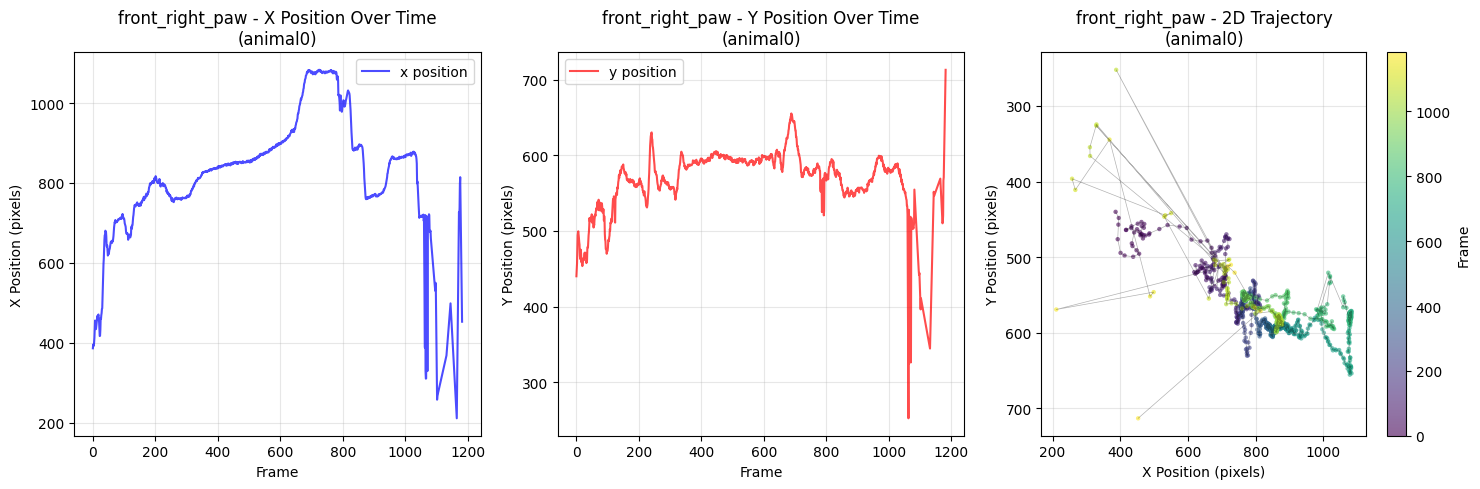

In [ ]:
# Usage example:
fig = plot_bodypart_movement(processed_data, 'front_right_paw', individual='animal0', min_likelihood=0.0)
plt.show()

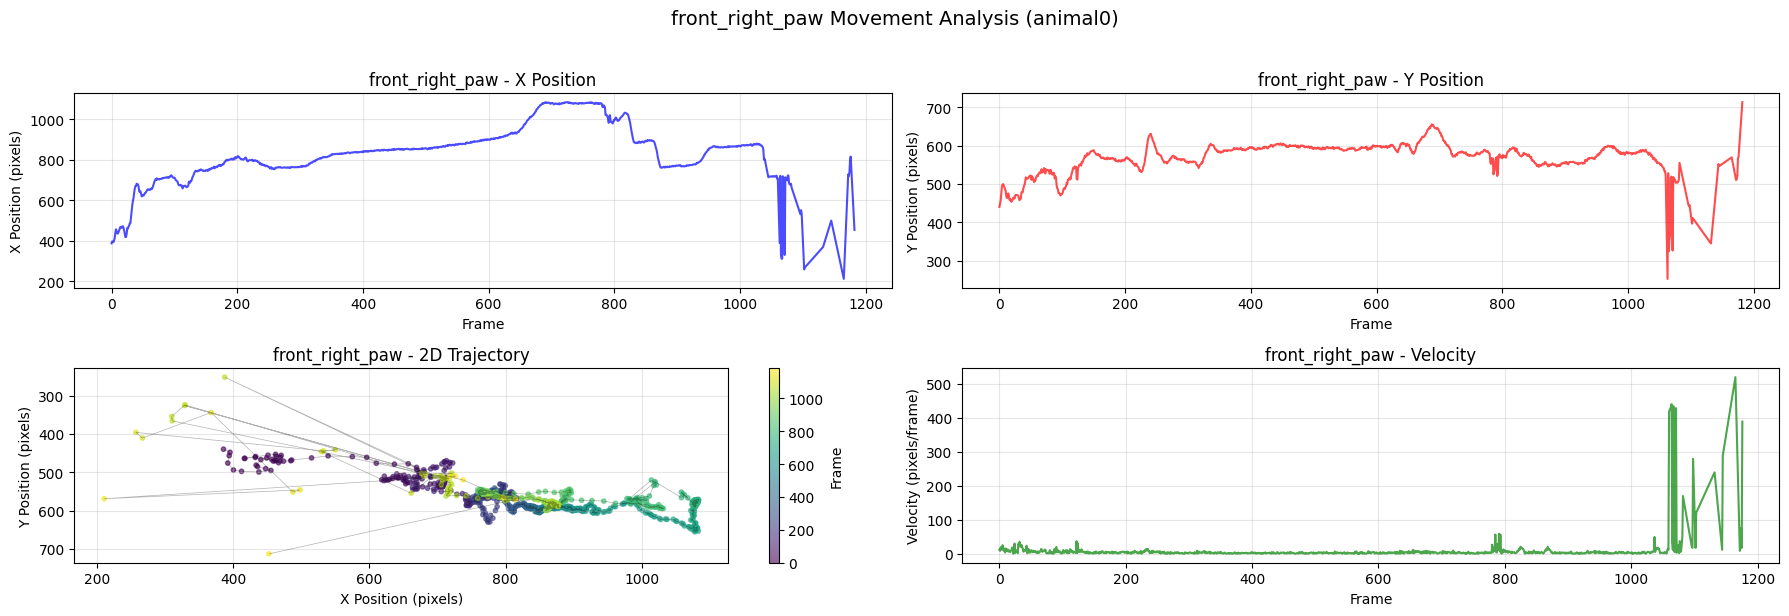

In [ ]:
fig = plot_bodypart_movement_enhanced(processed_data, 'front_right_paw', individual='animal0', min_likelihood=0.0)
plt.show()

Looks like the data goes crazy style around 1000 frames in. Lets take a peeksy

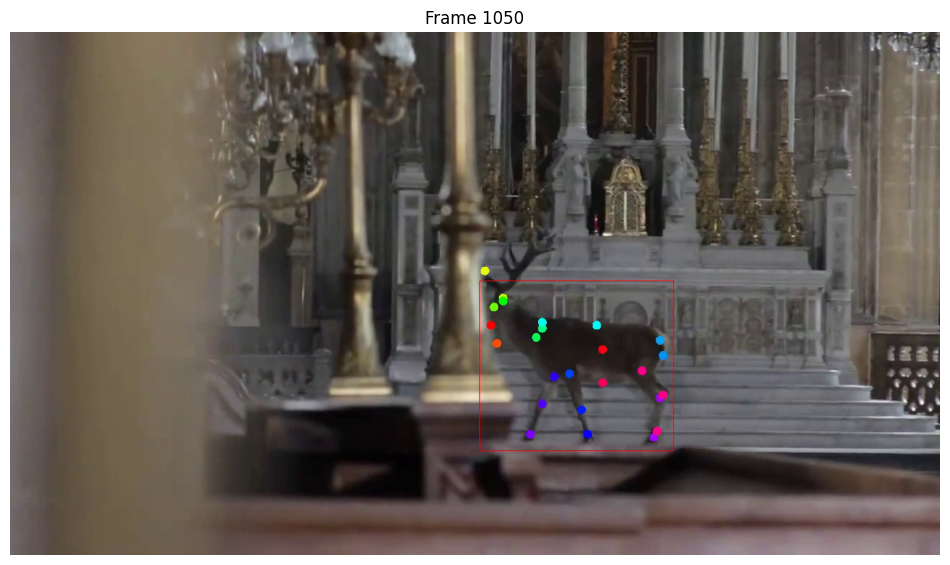

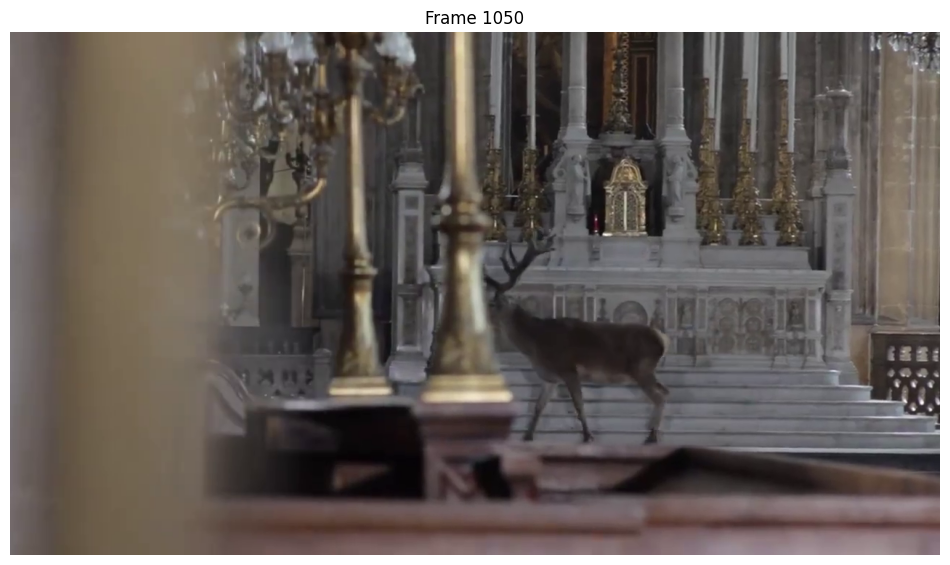

In [20]:
processed_vid_path = 'processed_vids/vid1_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4'
raw_vid_path = 'videos/vid1.mp4'

_ = get_frame_from_video(processed_vid_path, 1050, True)
_ = get_frame_from_video(raw_vid_path, 1050, True)

In [22]:
from pathlib import Path

output_path = Path('snippets') / 'clip_1050_to_end.mp4'

_ = extract_video_clip(processed_vid_path, 1050, end_frame=None, output_path=output_path)


Extracting frames 1050 to 1225 (176 frames)...
Video clip saved to: snippets\clip_1050_to_end.mp4


Yup, it happens when the deer crosses behind the pews, causing the pose estimation to begin failing

# Removing Erroneous Data
We want a way to automatically remove this erroneous pose estimation

Lets start by cutting the video off as soon as there is a huge change in position of all of the coordinates